In [259]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from numpy.random import default_rng
rng = default_rng(257) # seed

# Task 1

In [154]:
# define matrix sizes
N = 20
p = 1

In [180]:
X = rng.random((N, p)) * 10 # design matrix
w = rng.random(p) * 10 # weights
print('X', X)
print('w', w)

X [[6.6991354 ]
 [6.95201553]
 [2.74739651]
 [3.73942891]
 [9.41534494]
 [3.75842392]
 [7.86068141]
 [0.81843001]
 [0.21594212]
 [1.16905709]
 [5.5667241 ]
 [8.31674873]
 [1.19161075]
 [9.38352366]
 [0.79482071]
 [4.50310021]
 [8.34012171]
 [6.74922857]
 [9.51751578]
 [2.61178841]]
w [2.06500283]


In [187]:
y = X @ w + rng.normal(0, 1, N) * 3
print('y', y)

y [16.50663942 11.09415495  3.84092791  8.75345498 20.81448226  5.99780583
 14.84285386 -0.79080251 -1.3031344  -2.40786555 11.0405529  21.88786143
  5.51619564 19.68257646  7.18103007 13.17995982 15.98599722  9.07810398
 18.75206994  3.39137942]


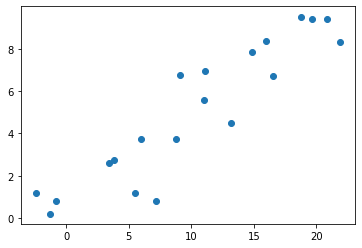

In [263]:
plt.scatter(y, X)

## Closed Form

In [189]:
w_closed = np.linalg.inv(X.T @ X) @ X.T @ y
print(w)

[2.06500283]


In [190]:
y_closed = X @ w_closed
print('y_closed', y_closed)

y_closed [13.73404265 14.25247768  5.63249711  7.66628424 19.30260268  7.70522632
 16.1153533   1.67788109  0.44270762  2.39670927 11.41246171 17.05034679
  2.44294702 19.23736518  1.62947917  9.23190331 17.09826424 13.83673975
 19.51206534  5.35448402]


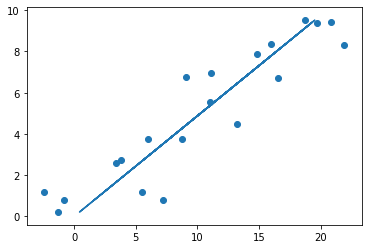

In [262]:
plt.plot(y_closed, X)
plt.scatter(y, X)

## Gradient Descent

In [273]:
w_gd = rng.random(p) * 10 # initialise gd weights
learning_rate_gd = 0.001
maxIter_gd = 100
iterError_gd = np.zeros(maxIter_gd)
for i in range(100):
    iterError_gd[i] = (y - X@w_gd).T @ (y - X@w_gd) # error
    error_diff_gd = -2 * X.T @ (y - X@w_gd) # derivative of error
    w_gd -= learning_rate_gd * error_diff_gd # weight update

y_gd = X @ w_gd

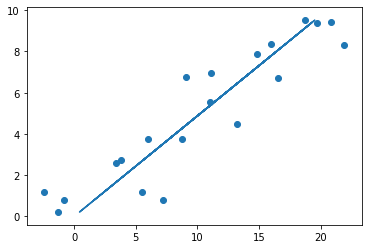

In [274]:
plt.plot(y_gd, X)
plt.scatter(y, X)

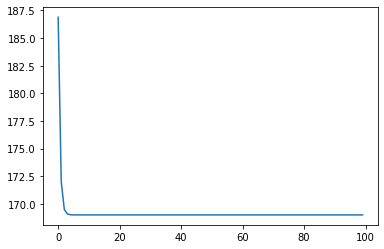

In [275]:
plt.plot(iterError_gd)

## Stochastic Gradient Descent

In [319]:
w_sgd = rng.random(p)
learning_rate_sgd = 0.01
maxIter_sgd = 200
iterError_sgd = np.zeros(maxIter_sgd)
for i in range(maxIter_sgd):
    iterError_sgd[i] = (y - X@w_sgd).T @ (y - X@w_sgd)
    sgd_iter = rng.integers(0, N) # random integer
    x_iter = X[sgd_iter] # random sample of X
    y_iter = y[sgd_iter] # random sample of Y
    error_diff_sgd = -(y_iter - w_sgd.T*x_iter)*x_iter # derivative of error
    w_sgd -= learning_rate_sgd * error_diff_sgd # sgd update

y_sgd = X @ w_sgd

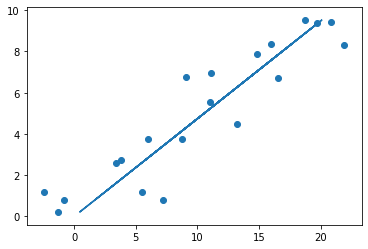

In [320]:
plt.plot(y_sgd, X)
plt.scatter(y, X)

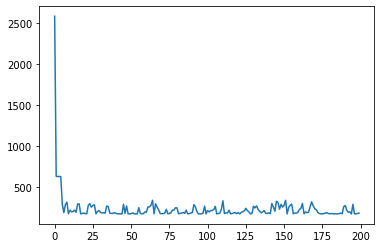

In [321]:
plt.plot(iterError_sgd)

# Task 2